Download iris dataset and usual libraries

In [ ]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
#save data information as variable
iris = load_iris()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.mixture import GaussianMixture 
import sklearn
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [ ]:
import pandas as pd
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#target data into data frame
target = pd.DataFrame(iris.target)
#rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([data, target], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


GMM Model

In [202]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [203]:
y_cluster_gmm = gmm.predict(data)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [207]:
# Accuracy for model 
print("model accuracy= ", (np.sum(y_cluster_gmm)/len(y_cluster_gmm)))

model accuracy=  0.9666666666666667


In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

In [ ]:
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

Importing blobs

In [ ]:
from sklearn.datasets import make_blobs
X_blob,y_blob = sklearn.datasets.make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

In [ ]:
print(X_blob.shape)

(2000, 2)


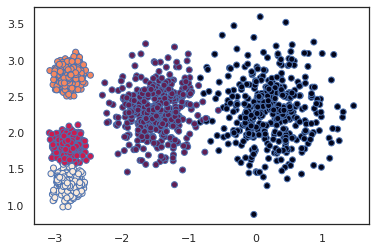

In [ ]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, edgecolor='b')
plt.show()

KMeans

In [ ]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(data)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 1,
       4, 4, 2, 4, 2, 4, 2, 1, 1, 1, 1, 2, 1, 4, 4, 4, 4, 2, 4, 1, 1, 1,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 3, 2, 2, 3, 4, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2], dtype=int32)

In [208]:
centroids = km.cluster_centers_
print(centroids)

[[-2.80113649  1.30160099]
 [-0.11441133  2.06443503]
 [-1.72932005  2.4180001 ]
 [-2.78879327  2.79753074]
 [-2.80191559  1.81044904]
 [ 0.62154309  2.08913128]
 [ 0.24678821  2.72356314]
 [-1.4697488   1.97526548]
 [-1.13350545  2.51986641]]


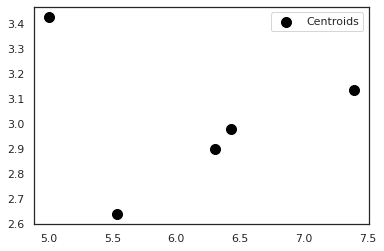

In [ ]:
from sklearn.cluster import KMeans
#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [ ]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_new)
y_cluster_kmeans

array([0, 2, 1, 1], dtype=int32)

In [ ]:
centroids = km.cluster_centers_
print(centroids)

[[ 0.    2.  ]
 [-3.    2.75]
 [ 3.    2.  ]]


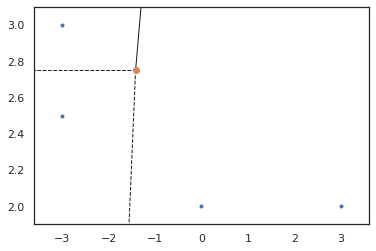

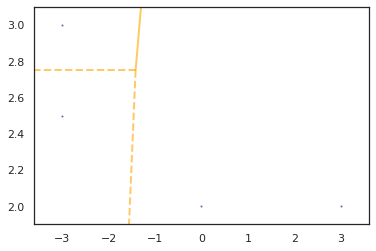

In [ ]:
import matplotlib.pyplot as plt
>>> points = X_new #random
>>> from scipy.spatial import Voronoi, voronoi_plot_2d
>>> vor = Voronoi(points)
voronoi_plot_2d

>>> fig = voronoi_plot_2d(vor)
voronoi_plot_2d

>>> fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
...                 line_width=2, line_alpha=0.6, point_size=2)
>>> plt.show()


In [ ]:
km2 = KMeans(n_clusters=3)
km3 = KMeans(n_clusters=8)
km2.fit(X_blob)
km3.fit(X_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y2_cluster_kmeans = km2.fit_predict(X_blob)
y2_cluster_kmeans

array([0, 2, 1, ..., 2, 0, 0], dtype=int32)

In [ ]:
print(y2_cluster_kmeans[:10])
print()

[0 2 1 1 2 0 0 0 0 0]



In [ ]:
y3_cluster_kmeans = km3.fit_predict(X_blob)
y3_cluster_kmeans

array([3, 1, 7, ..., 4, 3, 2], dtype=int32)

In [ ]:
print(y3_cluster_kmeans[:10])
print()

[3 1 7 5 4 3 5 3 3 3]



In [ ]:
centroid2 = km2.cluster_centers_
print("Centroid - ")
print(centroid2)

Centroid - 
[[-2.18195075  2.56091531]
 [ 0.15117127  2.29835335]
 [-2.79950682  1.55863005]]


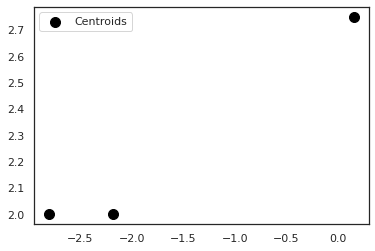

In [ ]:
from sklearn.cluster import KMeans
#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [ ]:
centroid3 = km3.cluster_centers_
print("Centroid - ")
print(centroid3)

Centroid - 
[[ 0.24678821  2.72356314]
 [-2.80191559  1.81044904]
 [-1.25035896  2.53190678]
 [-2.78720742  2.79702143]
 [-2.80113649  1.30160099]
 [-1.62358967  2.139415  ]
 [ 0.61863984  2.0894302 ]
 [-0.13349668  2.07232087]]


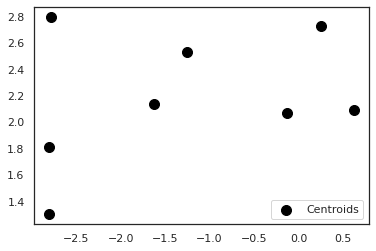

In [ ]:
from sklearn.cluster import KMeans
#Plotting the centroids of the clusters
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [ ]:
print("Displaying the different inertia values when n_cluster = 3 and n_cluster = 8: ")
print("Inertia when k=3 : ",km2.inertia_)
print("Inertia when k=8: ",km3.inertia_)
print()


Displaying the different inertia values when n_cluster = 3 and n_cluster = 8: 
Inertia when k=3 :  673.2569663864233
Inertia when k=8:  134.63434143734457



In [ ]:
# Plotting the k vs inertias
sumofsqu = []
for i in range(2,10):
    km = KMeans(i)
    km.fit(X_blob)
    sumofsqu_iteration = km.inertia_
    sumofsqu.append(sumofsqu_iteration)
print("Within clusters sum of squares (inertias): ")
print(sumofsqu)
print()
print("Observation: ")
print("The sequences decreases with big leaps")
print()

Within clusters sum of squares (inertias): 
[1173.9142297714045, 673.2569663864233, 286.06823504611094, 233.94795912014598, 192.13695211546928, 162.89904803010154, 134.76472920935407, 118.26794711427343]

Observation: 
The sequences decreases with big leaps



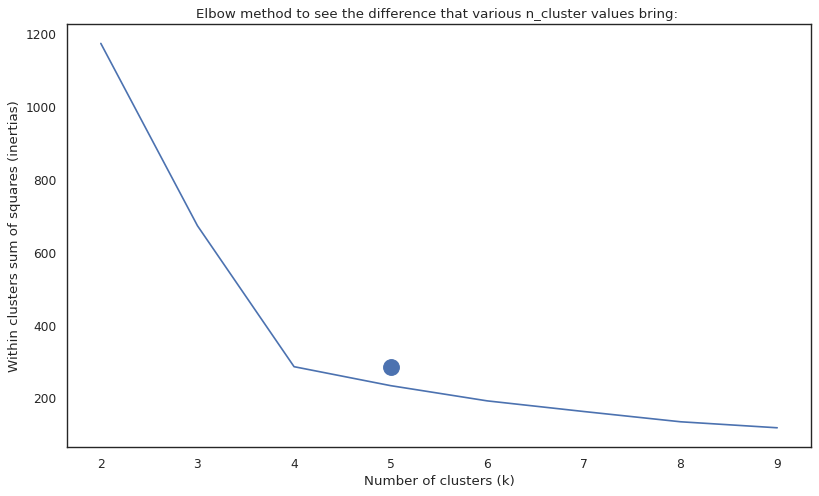

In [209]:
plt.figure(figsize=(12,7), dpi=80)
number_clusters = range(2,10)
plt.plot(number_clusters,sumofsqu)
plt.scatter(5, sumofsqu[2] ,marker="o", s = 200)
plt.title("Elbow method to see the difference that various n_cluster values bring: ")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within clusters sum of squares (inertias)")
plt.show()